First I have imported the dataset using pandas library.

In [1]:
import pandas as pd

df = pd.read_csv('/content/NIFTY 50-04-09-2023-to-04-09-2024.csv')
print(df)


           Date      Open      High       Low     Close   Shares Traded   \
0    04-SEP-2023  19525.05  19545.15  19432.85  19528.80     396071122.0   
1    05-SEP-2023  19564.65  19587.05  19525.75  19574.90     303958622.0   
2    06-SEP-2023  19581.20  19636.45  19491.50  19611.05     512974083.0   
3    07-SEP-2023  19598.65  19737.00  19550.05  19727.05     304929822.0   
4    08-SEP-2023  19774.80  19867.15  19728.05  19819.95     288093693.0   
..           ...       ...       ...       ...       ...             ...   
244  29-AUG-2024  25035.30  25192.90  24998.50  25151.95     353993900.0   
245  30-AUG-2024  25249.70  25268.35  25199.40  25235.90     638166179.0   
246  02-SEP-2024  25333.60  25333.65  25235.50  25278.70     222815249.0   
247  03-SEP-2024  25313.40  25321.70  25235.80  25279.85     212131921.0   
248  04-SEP-2024  25089.95  25216.00  25083.80  25198.70             NaN   

     Turnover (₹ Cr)  
0           24822.79  
1           24029.89  
2           32500.

Moving the class variable "Close" to the end.

In [ ]:
# to change the column order

new_column_order = [ 'Date', 'Open', 'High', 'Low', 'Shares Traded', 'Turnover (₹ Cr)', 'Close']  # Replace with your desired order
df = df[new_column_order]
print(df)


            Date      Open      High       Low  Shares Traded  \
0    29-AUG-2023  19374.85  19377.90  19309.10    307388116.0   
1    30-AUG-2023  19433.45  19452.80  19334.75    233004568.0   
2    31-AUG-2023  19375.55  19388.20  19223.65    562557215.0   
3    01-SEP-2023  19258.15  19458.55  19255.70    372502191.0   
4    04-SEP-2023  19525.05  19545.15  19432.85    396071122.0   
..           ...       ...       ...       ...            ...   
243  22-AUG-2024  24863.40  24867.35  24784.45    220345125.0   
244  23-AUG-2024  24845.40  24858.40  24771.65    206800655.0   
245  26-AUG-2024  24906.10  25043.80  24874.70    210266456.0   
246  27-AUG-2024  25024.80  25073.10  24973.65    223346636.0   
247  28-AUG-2024  25030.80  25129.60  24964.65    220419448.0   

     Turnover (₹ Cr)     Close  
0           22501.12  19342.65  
1           19877.49  19347.45  
2           45699.54  19253.80  
3           25962.38  19435.30  
4           24822.79  19528.80  
..               ... 

Preprocessing to change the date feature from the categorical value to numerical value.

In [ ]:
# Preprocess the date to a numeric value

import datetime

def date_to_numeric(date_str):
  """Converts a date string to a numeric value."""
  date_obj = datetime.datetime.strptime(date_str, '%d-%b-%Y')
  return date_obj.toordinal()

# Apply the function to the 'Date' column
df['Date'] = df['Date'].apply(date_to_numeric)
print(df)


       Date      Open      High       Low  Shares Traded  Turnover (₹ Cr)  \
0    738761  19374.85  19377.90  19309.10    307388116.0         22501.12   
1    738762  19433.45  19452.80  19334.75    233004568.0         19877.49   
2    738763  19375.55  19388.20  19223.65    562557215.0         45699.54   
3    738764  19258.15  19458.55  19255.70    372502191.0         25962.38   
4    738767  19525.05  19545.15  19432.85    396071122.0         24822.79   
..      ...       ...       ...       ...            ...              ...   
243  739120  24863.40  24867.35  24784.45    220345125.0         24227.03   
244  739121  24845.40  24858.40  24771.65    206800655.0         23134.22   
245  739124  24906.10  25043.80  24874.70    210266456.0         22166.86   
246  739125  25024.80  25073.10  24973.65    223346636.0         26695.00   
247  739126  25030.80  25129.60  24964.65    220419448.0         26994.19   

        Close  
0    19342.65  
1    19347.45  
2    19253.80  
3    19435.

Preprocess to remove any null values and missing values.

In [ ]:
# Remove rows with NaN or missing values
df.dropna(inplace=True)

print(df)


       Date      Open      High       Low  Shares Traded  Turnover (₹ Cr)  \
0    738761  19374.85  19377.90  19309.10    307388116.0         22501.12   
1    738762  19433.45  19452.80  19334.75    233004568.0         19877.49   
2    738763  19375.55  19388.20  19223.65    562557215.0         45699.54   
3    738764  19258.15  19458.55  19255.70    372502191.0         25962.38   
4    738767  19525.05  19545.15  19432.85    396071122.0         24822.79   
..      ...       ...       ...       ...            ...              ...   
243  739120  24863.40  24867.35  24784.45    220345125.0         24227.03   
244  739121  24845.40  24858.40  24771.65    206800655.0         23134.22   
245  739124  24906.10  25043.80  24874.70    210266456.0         22166.86   
246  739125  25024.80  25073.10  24973.65    223346636.0         26695.00   
247  739126  25030.80  25129.60  24964.65    220419448.0         26994.19   

        Close  
0    19342.65  
1    19347.45  
2    19253.80  
3    19435.

Using the sklearn library to split the dataset into training and testing sets.

In [ ]:
# use  sklearn train_test split to split the data

from sklearn.model_selection import train_test_split

# Change 'Close' as y because it is the response
X = df.drop('Close', axis=1)
y = df['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Using the sklearn model to build and fit a linear model for the training data.

In [ ]:
from sklearn import linear_model

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

LinearRegression()

Predict the value for x values in the training dataset and find the error and r2 ecores for the training data.

In [ ]:
# Make predictions using the training set
y_train_pred = regr.predict(X_train)

# Calculate the training accuracy
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
train_r2_score = r2_score(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)

print(f"Training Accuracy (R-squared): {train_r2_score}")
print(f"Training Accuracy (Mean Squared Error): {train_mse}")
print(f"Training Accuracy (Mean Absolute Error): {train_mae}")


Training Accuracy (R-squared): 0.999060769426565
Training Accuracy (Mean Squared Error): 2547.942778598348
Training Accuracy (Mean Absolute Error): 36.678129531856996


Predict the y for test x values and find r2 scores and error for the test dataset.

In [ ]:
# Make predictions using the test set
y_test_pred = regr.predict(X_test)

test_r2_score = r2_score(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

print(f"Test Accuracy (R-squared): {test_r2_score}")
print(f"Test Accuracy (Mean Squared Error): {test_mse}")
print(f"Test Accuracy (Mean Absolute Error): {test_mae}")

Test Accuracy (R-squared): 0.9983125949030885
Test Accuracy (Mean Squared Error): 5820.57164822133
Test Accuracy (Mean Absolute Error): 52.579016614662905


To find the most significant predictor among the given values we find the coefficients and arrange them in descending order and select the largest value.

In [ ]:
# Find the most significant predictor

# Get the coefficients of the model
coefficients = regr.coef_

# Create a DataFrame to display coefficients with corresponding features
feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})

# Sort the DataFrame by the absolute value of the coefficients
feature_importance = feature_importance.reindex(feature_importance['Coefficient'].abs().sort_values(ascending=False).index)

print(feature_importance)


           Feature   Coefficient
2             High  9.581977e-01
3              Low  6.952326e-01
1             Open -6.660821e-01
0             Date  2.013801e-01
5  Turnover (₹ Cr)  2.357914e-04
4    Shares Traded  5.016929e-10


Plot the relation between each of the predictor and the response.

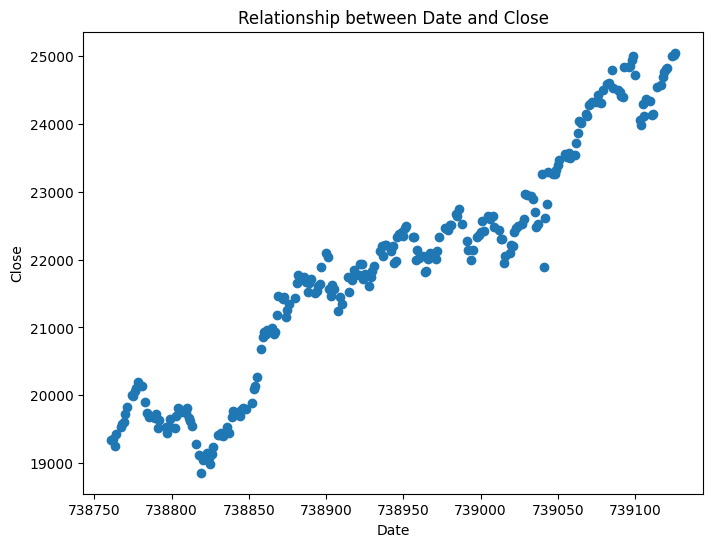

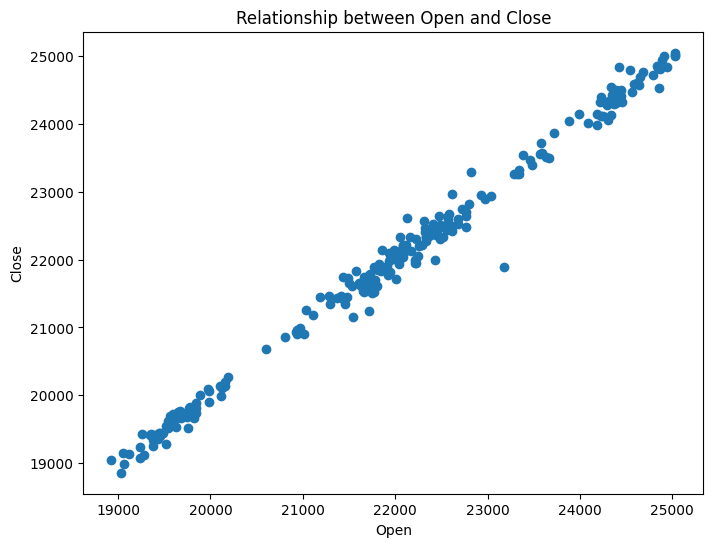

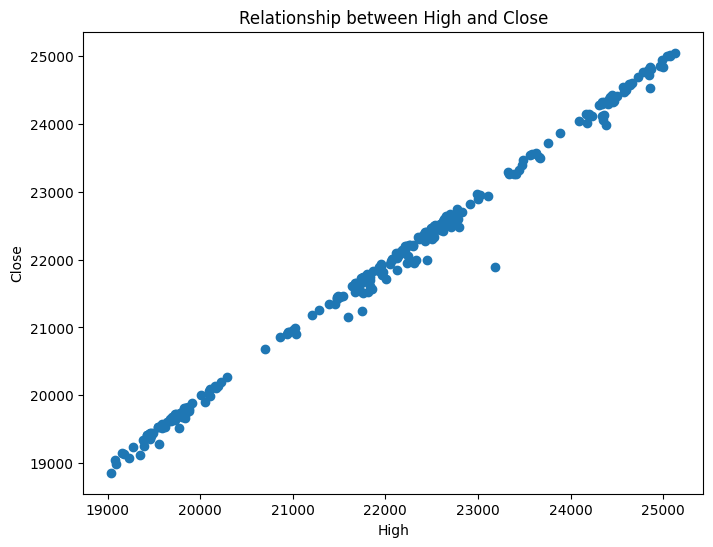

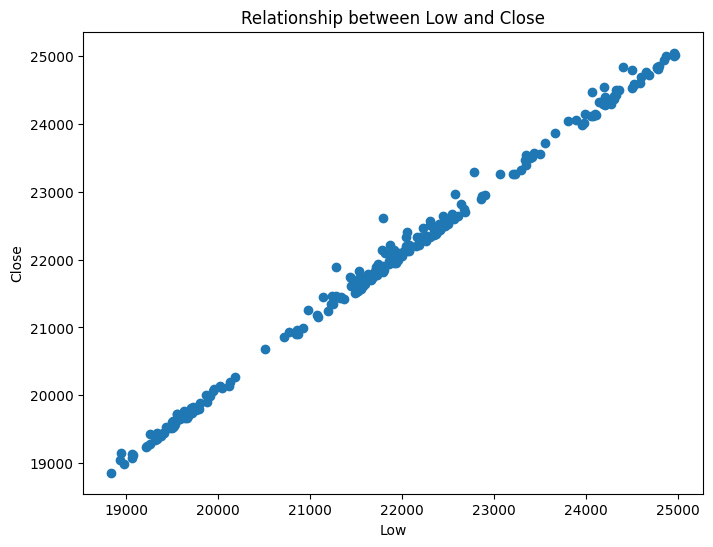

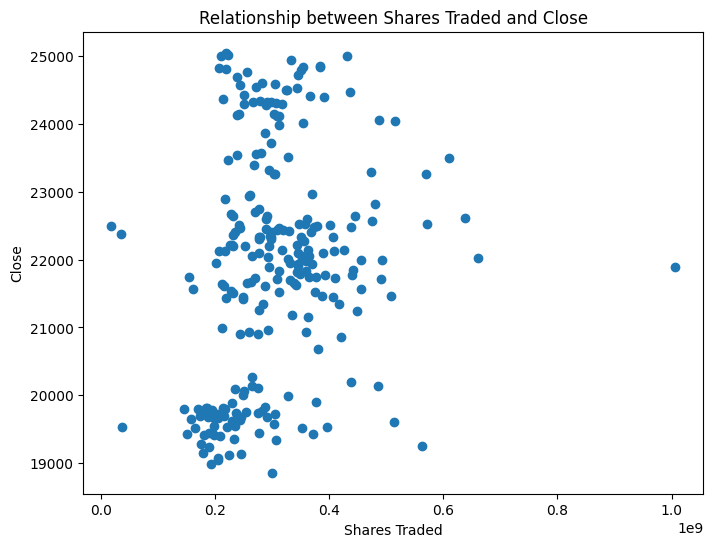

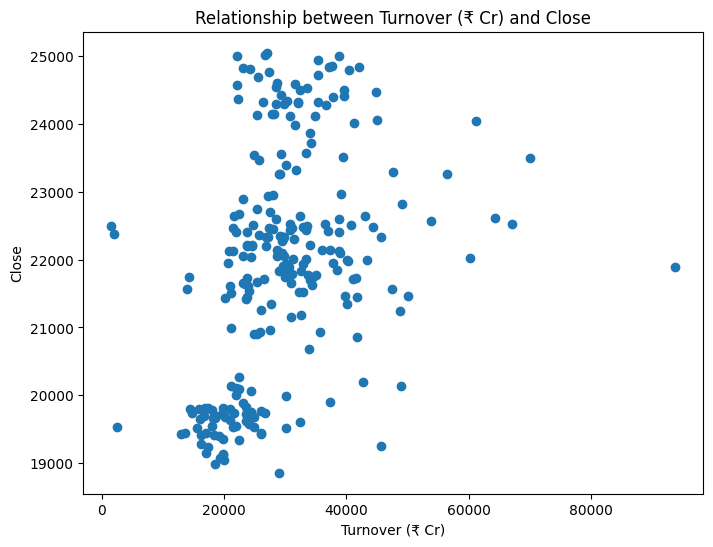

In [ ]:
# Plot between each predictor and the response

import matplotlib.pyplot as plt

# Iterate over each predictor
for feature in X.columns:
  plt.figure(figsize=(8, 6))
  plt.scatter(df[feature], df['Close'])
  plt.xlabel(feature)
  plt.ylabel('Close')
  plt.title(f'Relationship between {feature} and Close')
  plt.show()


Plot the actual value and predicted value of the response for each predictor.

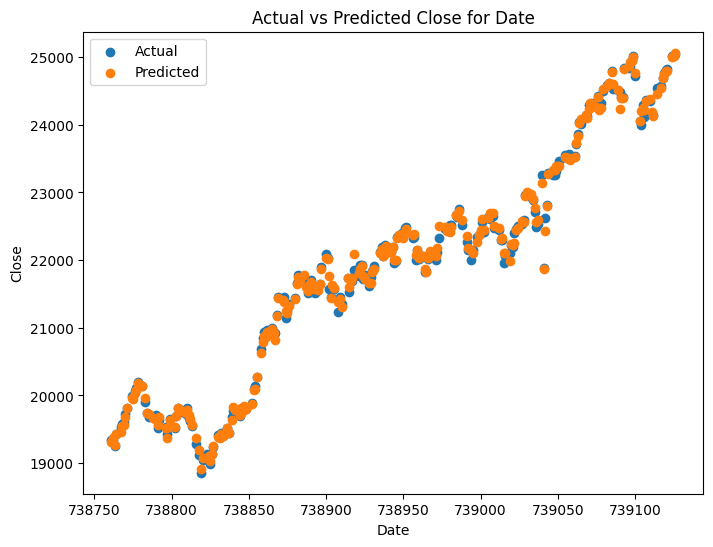

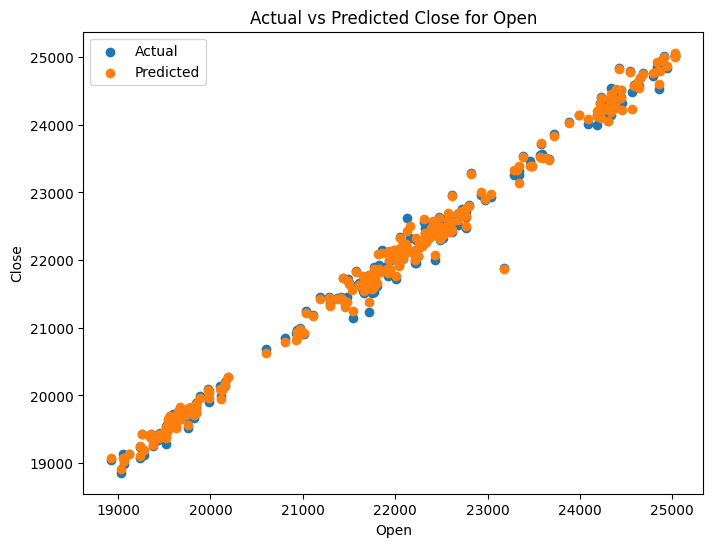

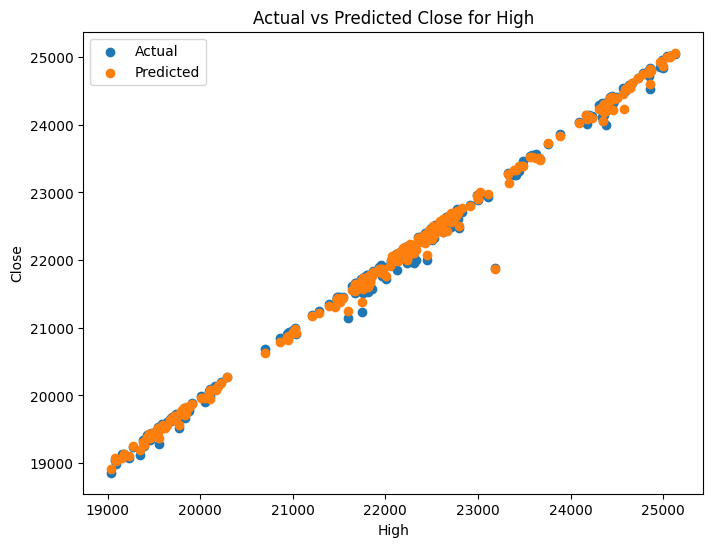

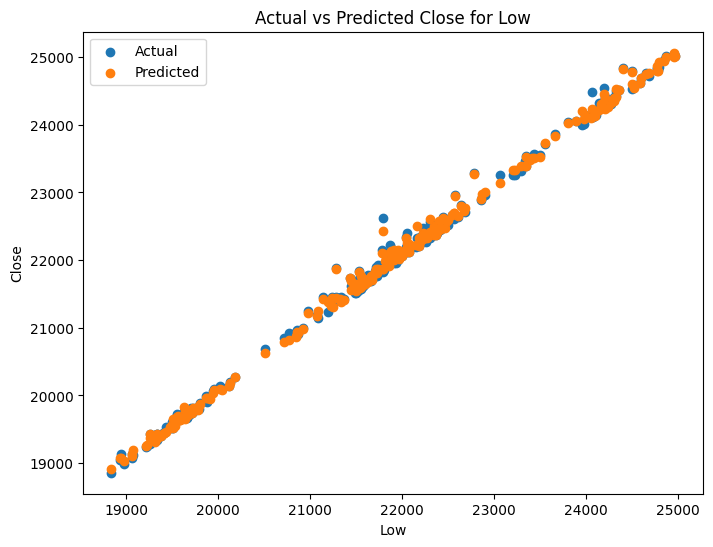

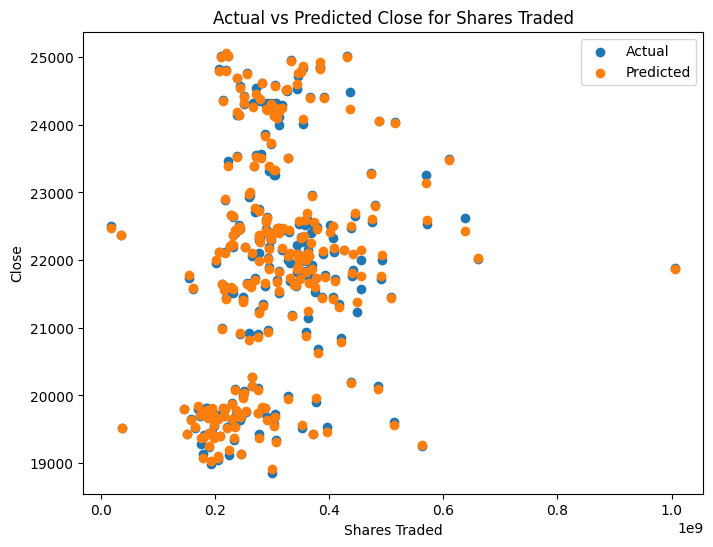

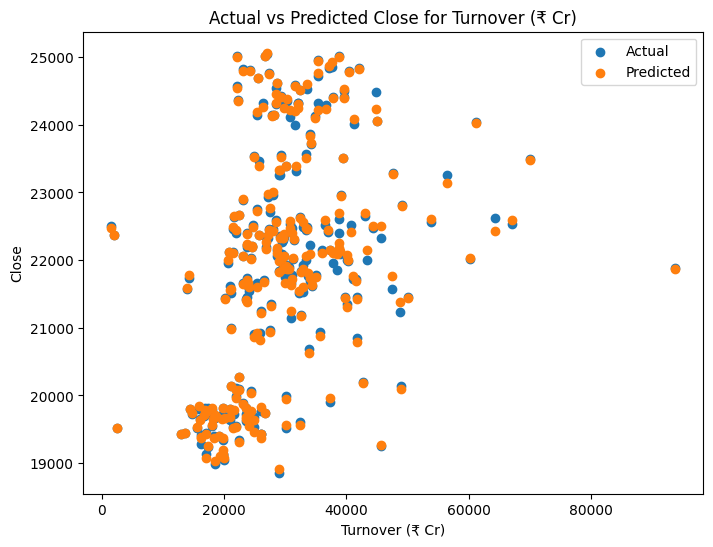

In [ ]:
# Plot the actual value and the predicted value for the close for each feature

# Plot the actual value and the predicted value for the close for each feature
for feature in X.columns:
  plt.figure(figsize=(8, 6))
  plt.scatter(df[feature], df['Close'], label='Actual')
  plt.scatter(df[feature], regr.predict(X), label='Predicted')
  plt.xlabel(feature)
  plt.ylabel('Close')
  plt.title(f'Actual vs Predicted Close for {feature}')
  plt.legend()
  plt.show()


To find the closing value for today use I have assumed the closing value of yesterday as today's opening and other values as same as yesterday.

In [ ]:
# Use today for date and yesterday's close for today's open and other values being the same yesterday's value predict the new closing value

# Get the last row of the dataframe
last_row = df.iloc[-1]

# Get the last date and add 1 to it
last_date = last_row['Date'] + 1

# Create a new dataframe with the last date and previous values
new_data = pd.DataFrame({
    'Date': [last_date],
    'Open': [last_row['Close']],  # Use previous close as open
    'High': [last_row['High']],
    'Low': [last_row['Low']],
    'Shares Traded': [last_row['Shares Traded']],
    'Turnover (₹ Cr)': [last_row['Turnover (₹ Cr)']]
})

# Predict the close value for the new data
predicted_close = regr.predict(new_data)

print(f"Predicted close value for the next day: {predicted_close[0]}")


Predicted close value for the next day: 25051.964084929175


Here I've build a new model using simple linear regression by using the most significant predictor from the previous model as the only predictor. I've also calculated the training and test errors and accuracy scores.

In [ ]:
# Train a new model with a single most significant feature

# Get the most significant feature
most_significant_feature = feature_importance['Feature'].iloc[0]

# Create a new DataFrame with only the most significant feature
X_single_feature = df[[most_significant_feature]]

# Split the data into training and testing sets
X_train_single, X_test_single, y_train_single, y_test_single = train_test_split(
    X_single_feature, y, test_size=0.2, random_state=100
)

# Create a new linear regression model
regr_single = linear_model.LinearRegression()

# Train the model with the single feature
regr_single.fit(X_train_single, y_train_single)

# Make predictions using the training set
y_train_pred_single = regr_single.predict(X_train_single)

# Calculate the training accuracy
train_r2_score_single = r2_score(y_train_single, y_train_pred_single)
train_mse_single = mean_squared_error(y_train_single, y_train_pred_single)
train_mae_single = mean_absolute_error(y_train_single, y_train_pred_single)

print(f"Training Accuracy (R-squared) with single feature: {train_r2_score_single}")
print(f"Training Accuracy (Mean Squared Error) with single feature: {train_mse_single}")
print(f"Training Accuracy (Mean Absolute Error) with single feature: {train_mae_single}")

# Make predictions using the test set
y_test_pred_single = regr_single.predict(X_test_single)

# Calculate the test accuracy
test_r2_score_single = r2_score(y_test_single, y_test_pred_single)
test_mse_single = mean_squared_error(y_test_single, y_test_pred_single)
test_mae_single = mean_absolute_error(y_test_single, y_test_pred_single)

print(f"Test Accuracy (R-squared) with single feature: {test_r2_score_single}")
print(f"Test Accuracy (Mean Squared Error) with single feature: {test_mse_single}")
print(f"Test Accuracy (Mean Absolute Error) with single feature: {test_mae_single}")


Training Accuracy (R-squared) with single feature: 0.9946746206601613
Training Accuracy (Mean Squared Error) with single feature: 15160.50241519136
Training Accuracy (Mean Absolute Error) with single feature: 73.50938672516367
Test Accuracy (R-squared) with single feature: 0.9982961525594085
Test Accuracy (Mean Squared Error) with single feature: 4857.8600121078025
Test Accuracy (Mean Absolute Error) with single feature: 60.14033274783258


This is a plot of the response against the predictor of the new model.

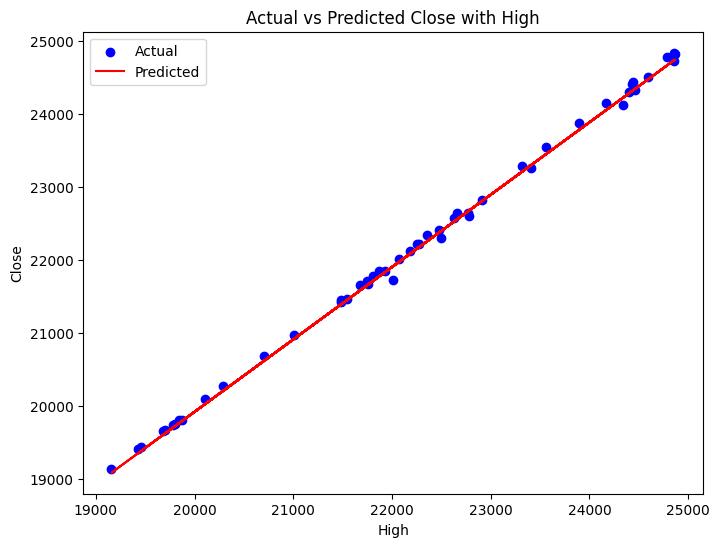

In [ ]:
# Plot the new model  with a line

# Plot the actual vs predicted values with a line
plt.figure(figsize=(8, 6))
plt.scatter(X_test_single, y_test_single, color='blue', label='Actual')
plt.plot(X_test_single, y_test_pred_single, color='red', label='Predicted')
plt.xlabel(most_significant_feature)
plt.ylabel('Close')
plt.title(f'Actual vs Predicted Close with {most_significant_feature}')
plt.legend()
plt.show()
